# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
base_url =  "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | san cristobal de las casas
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | skive
Processing Record 9 of Set 1 | howard springs
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | ixtapa
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | garissa
Processing Record 15 of Set 1 | maues
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | katsuren-haebaru
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | las lomitas
Processing Record 21 of Set 1 | hoemul-li
Processing Record 22 of Set 1 | tyuratam
P

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-30.33,90,0,1.03,CA,1733304977
1,iqaluit,63.7506,-68.5145,-16.15,72,100,4.12,CA,1733305181
2,san cristobal de las casas,16.7500,-92.6333,7.53,85,98,3.43,MX,1733305183
3,adamstown,-25.0660,-130.1015,23.22,82,100,6.58,PN,1733305184
4,daru,-9.0763,143.2092,27.83,81,97,4.78,PG,1733305185


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-30.33,90,0,1.03,CA,1733304977
1,iqaluit,63.7506,-68.5145,-16.15,72,100,4.12,CA,1733305181
2,san cristobal de las casas,16.7500,-92.6333,7.53,85,98,3.43,MX,1733305183
3,adamstown,-25.0660,-130.1015,23.22,82,100,6.58,PN,1733305184
4,daru,-9.0763,143.2092,27.83,81,97,4.78,PG,1733305185


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

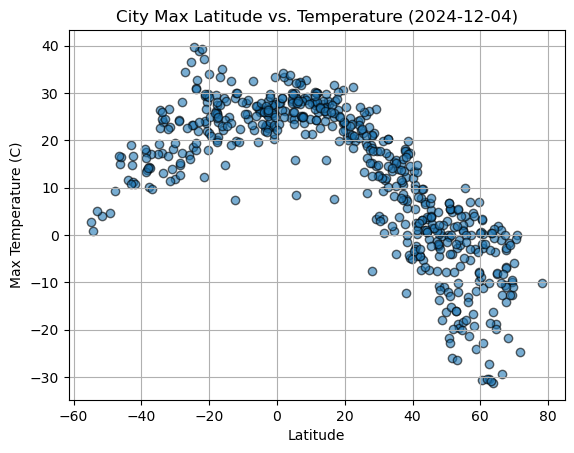

In [79]:
# Build scatter plot for latitude vs. temperature

fig1 = plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"], alpha=0.6, edgecolors='black')

# Incorporate the other graph properties
current_date = datetime.now().strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.grid("True")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

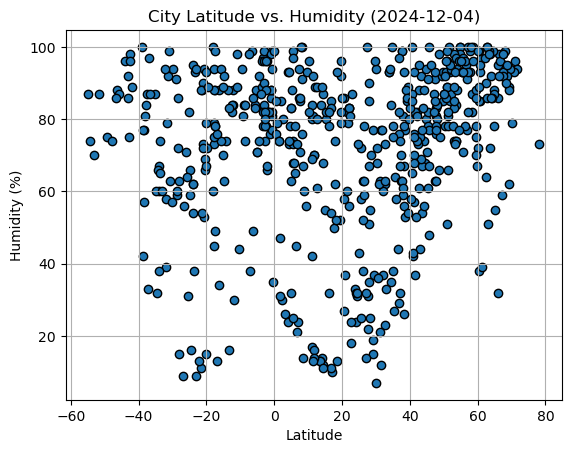

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid("True")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

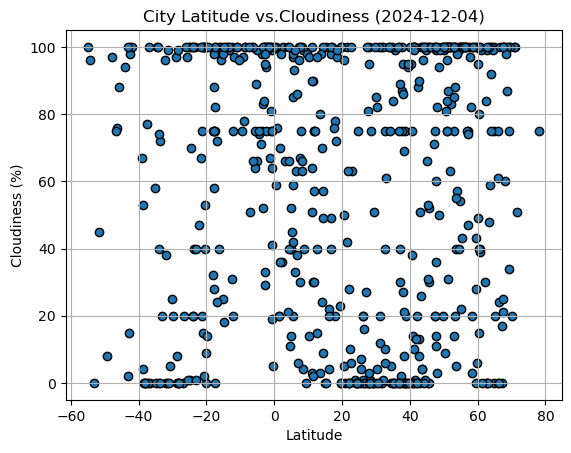

In [81]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs.Cloudiness ({current_date})")
plt.grid("True")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

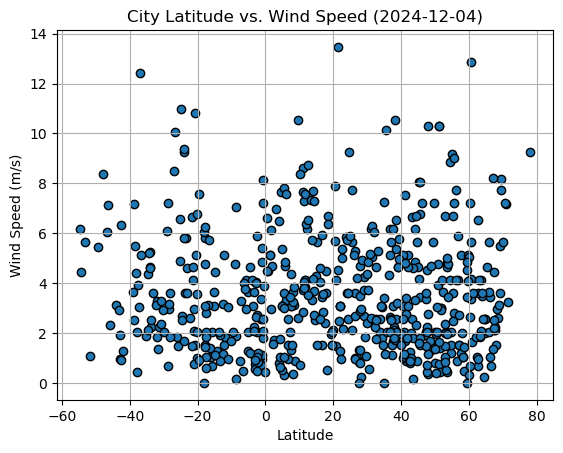

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid("True")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def linear_regress_calculation(x_coordinate, y_coordinate):
    slope, intercept, r_value , p_value, stderr = linregress(x_coordinate , y_coordinate)
   
    return slope, intercept, r_value

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-30.33,90,0,1.03,CA,1733304977
1,iqaluit,63.7506,-68.5145,-16.15,72,100,4.12,CA,1733305181
2,san cristobal de las casas,16.7500,-92.6333,7.53,85,98,3.43,MX,1733305183
5,nar'yan-mar,67.6713,53.0870,-6.78,95,100,2.24,RU,1733305186
7,skive,56.5667,9.0333,2.87,95,100,0.89,DK,1733305188


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,23.22,82,100,6.58,PN,1733305184
4,daru,-9.0763,143.2092,27.83,81,97,4.78,PG,1733305185
6,margaret river,-33.9500,115.0667,17.30,60,0,5.23,AU,1733305187
8,howard springs,-12.4970,131.0470,28.95,82,31,3.16,AU,1733305189
12,waitangi,-43.9535,-176.5597,11.57,96,94,3.13,NZ,1733305193


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7543440055654373


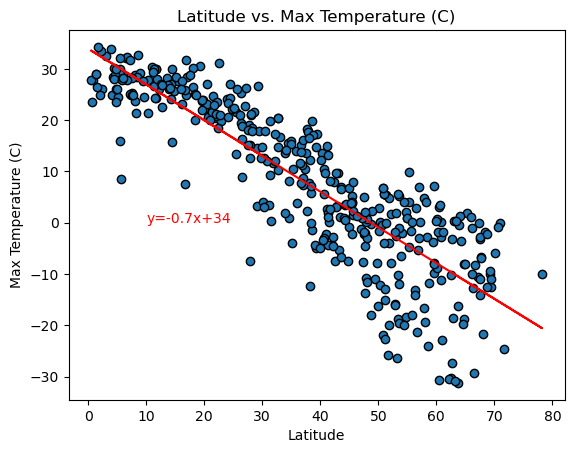

In [86]:
# Linear regression on Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Max Temp"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,0), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs. Max Temperature (C)")

print(f'The r^2 value is: {r_value**2}')

The r^2 value is: 0.34814098924362996


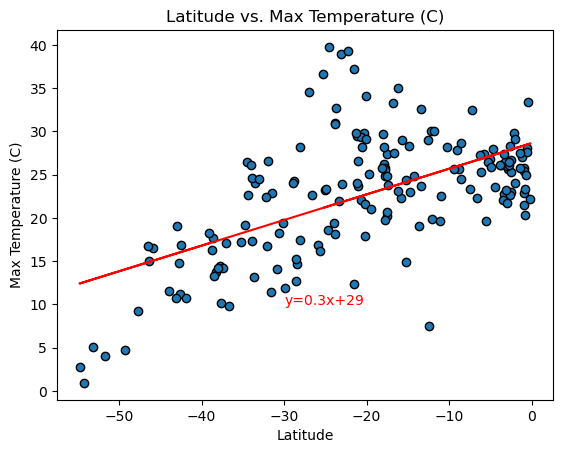

In [87]:
# Linear regression on Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Max Temp"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs. Max Temperature (C)")
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(-30,10), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs. Max Temperature (C)")

print(f'The r^2 value is: {r_value**2}')


**Discussion about the linear relationship:LATITUDE VS TEMPERATURE** 
Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that the temperature is maximun near the equator(0). As we away from the equator, the temperature decreases.It has a negative slope. The regression line intercept value shows that the maximum temperaure near the equator, for this set of data is around 34(C).The correlation coefficient (r_value) indicates that the temperature decreases with increase in latitude. A r-squared value of 0.75 shows that 75% of the variance in the dependent variable (temperature) can be explained by the independent variable(latitude).As the data point are very close to the regression line, it indicates a strong relationship between the variables.

Linear regression Analysis for Southern Hemisphere- On anlalysing the linear regression line,it is seen that the temperature rises as we move from the southern hemsphere, towards the equator.It has a positive slope. The correlation coefficient (r_value) indicates that the temperature increases with increase in latitude,i.e,there is positive dependency.  A r-squared value of 0.34 shows that only 34% of the variance in the dependent variable (temperature) can be explained by the independent variable(latitude) .This indicates there is not very strong relationship between the variables.

Thus, it can be said that temperature increases as we move from Southern hemisphere to equator and then decreases as we move towards Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.15744236192581068


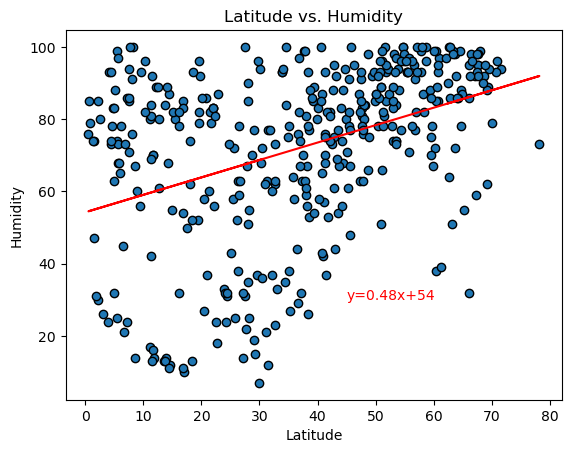

In [88]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Humidity"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(45,30), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs. Humidity")

print(f'The r^2 value is: {r_value**2}')

The r^2 value is: 0.016704053707291593


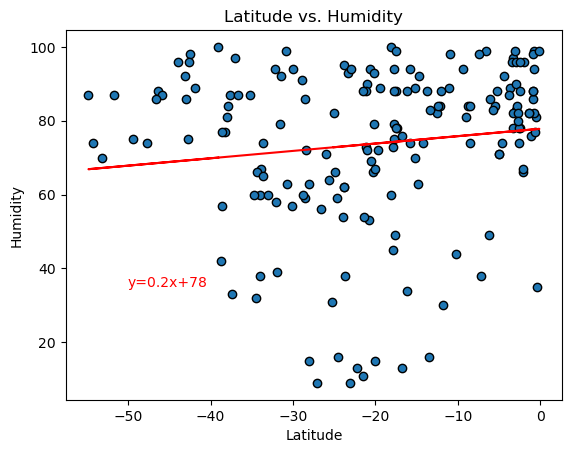

In [89]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Humidity"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(-50,35), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs. Humidity")

print(f'The r^2 value is: {r_value**2}')

**Discussion about the linear relationship:LATITUDE VS HUMIDITY**
Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that humidity is low near the equator and increases as we move away from the equator.It has a positive slope. A r-squared value of 0.15 shows that only 15% of the variance in the dependent variable (humidity) can be explained by the independent variable(latitude).This shows that the data points are loosely scattered  and there is a weak relationship between the variables.

Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that humidity is high near the equator and decreases as we move away from the equator towards the southern hemisphere.It has a positive slope. A r-squared value of 0.016 shows that only 1.6% of the variance in the dependent variable (humidity) can be explained by the independent variable(latitude).This shows that the data points follow a non-linear pattern and a linear regression model may not be appropriate..



### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.02168621979063673


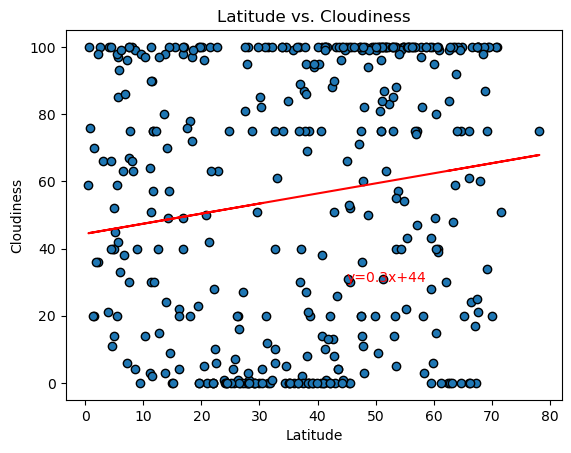

In [90]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Cloudiness"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(45,30), color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness")

print(f'The r^2 value is: {r_value**2}')

The r^2 value is: 0.1053543753656378


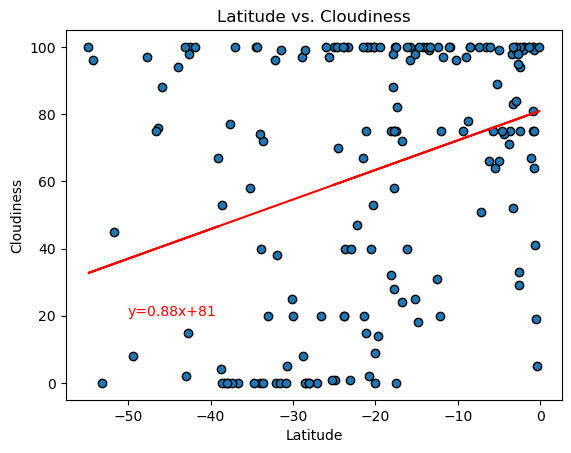

In [92]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Cloudiness"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(-50,20), color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness")

print(f'The r^2 value is: {r_value**2}')

**Discussion about the linear relationship: LATITUDE vS CLOUDINESS** 
Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that cloudiness is low near the equator and increases as we move away from the equator.It has a positive slope. A r-squared value of 0.02 shows that only 2% of the variance in the dependent variable (cloudiness) can be explained by the independent variable(latitude).This shows that the data points follow a non-linear pattern and a linear regression model may not be appropriate.

Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that cloudiness is high near the equator and decreases as we move away from the equator towards the southern hemisphere.It has a positive slope. A r-squared value of 0.10 shows that only 10% of the variance in the dependent variable (cloudiness) can be explained by the independent variable(latitude).This shows that the data points follow a non-linear pattern and a linear regression model may not be appropriate..



### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.005256639734177595


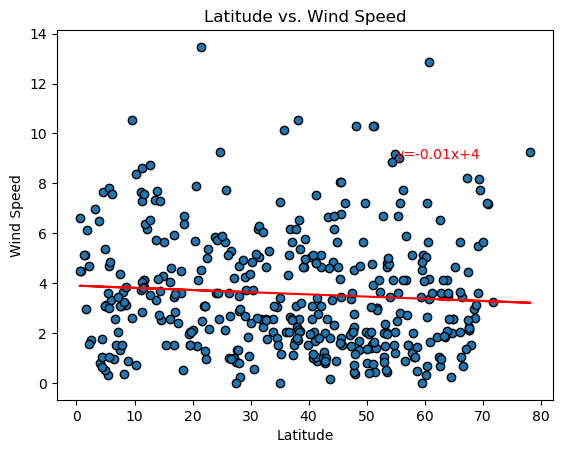

In [93]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Wind Speed"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(55,9), color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs. Wind Speed")

print(f'The r^2 value is: {r_value**2}')

The r^2 value is: 0.06053166150892916


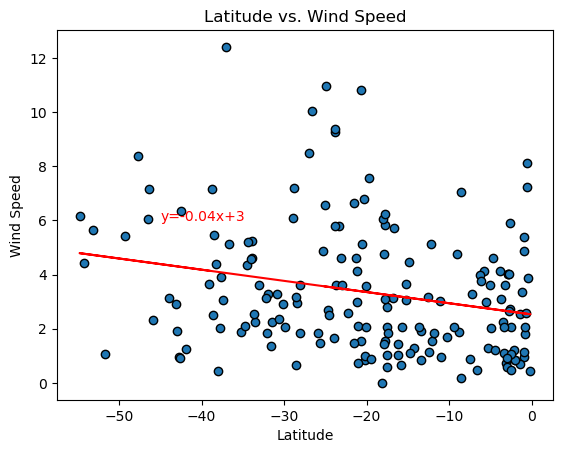

In [94]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Wind Speed"],edgecolors='black')
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(-45,6), color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs. Wind Speed")

print(f'The r^2 value is: {r_value**2}')

**Discussion about the linear relationship:LATITUDE VS WIND SPEED**

Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that there is only a slight variation in wind speed as me move from equator towards northern hemisphere.It has a negative slope. A r-squared value of 0.002 shows that only 0.2% of the variance in the dependent variable (wind speed) can be explained by the independent variable(latitude).This shows that the there is almost no linear correlation.

Linear regression Analysis for Northern Hemisphere- On analysing the linear regression line, it is seen that wind speed reduces on moving from southern hemisphere to equator .It has a positive slope. A r-squared value of 0.06 shows that only 6% of the variance in the dependent variable (wind speed) can be explained by the independent variable(latitude).This shows that the data points follow a non-linear pattern and a linear regression model may not be appropriate..

